In [1]:
import cv2
import numpy as np

from skimage import data
from skimage.morphology import disk, rectangle, octahedron
from skimage.filters import threshold_otsu, rank
from skimage.util import img_as_ubyte
import matplotlib.image as mpimg
from skimage.color import rgb2gray

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matpolotlib inline

UsageError: Line magic function `%matpolotlib` not found.


In [14]:
im = cv2.imread("image3.png")
img = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)

img = cv2.normalize(img, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
img = (255*img).astype(np.uint8)

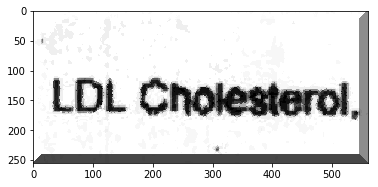

In [15]:
plt.imshow(img, cmap="gray")

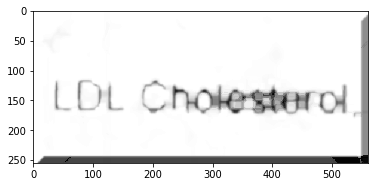

In [32]:
kernel = np.ones((5,5),np.uint8)
kernel_line = np.ones((31,1),np.uint8)
kernel_column = np.ones((1,31),np.uint8)

modified = cv2.fastNlMeansDenoising(img,10,10,7,21)

modified = cv2.dilate(modified, kernel, iterations = 1)
modified = cv2.blur(modified, (3,3))
modified = cv2.dilate(modified, kernel, iterations = 1)
modified = cv2.blur(modified, (3,3))

modified_line = cv2.dilate(modified, kernel_line, iterations = 3)
modified_column = cv2.dilate(modified, kernel_column, iterations = 3)
modified_uni = (modified_line + modified_column)

modified_final = cv2.bitwise_and(modified, modified_uni)
modified = cv2.fastNlMeansDenoising(modified_final,3,3,7,21)

plt.imshow(modified_final, cmap='gray')

In [38]:
np.max(modified_uni)

254

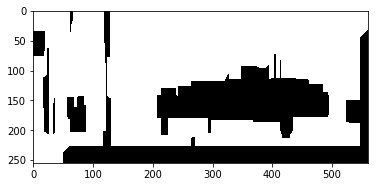

In [47]:
kernel = np.ones((3, 1), np.uint8)
modified_uni = cv2.erode(modified_uni, kernel, iterations=2)
modified_uni = cv2.dilate(modified_uni, kernel, iterations=1)

mask = (modified_uni > 253)
plt.imshow(mask  , cmap=plt.cm.gray)

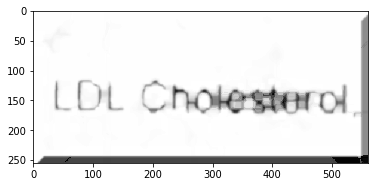

In [48]:
plt.imshow(modified_final - mask, cmap="gray")

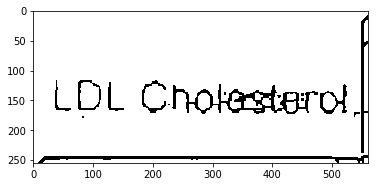

In [58]:
th2 = cv2.adaptiveThreshold(modified_final,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,13,3)
th3 = cv2.adaptiveThreshold(th2,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,21,7)

kernel = np.ones((3, 1), np.uint8)
opening = cv2.morphologyEx(th3, cv2.MORPH_OPEN, kernel)
closing = cv2.morphologyEx(opening, cv2.MORPH_CLOSE, kernel)

kernel = np.ones((1, 3), np.uint8)
opening = cv2.morphologyEx(closing, cv2.MORPH_OPEN, kernel)
closing = cv2.morphologyEx(opening, cv2.MORPH_CLOSE, kernel)

plt.imshow(closing , cmap=plt.cm.gray)

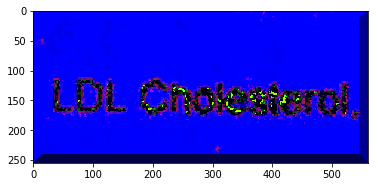

In [50]:
hsv = cv2.cvtColor(im, cv2.COLOR_BGR2HSV)
plt.imshow(hsv)